Pododdelek za spodbujanje kolesarjenja pri Oddelku za motorni promet in gospodarske dejavnosti Mestne občine Ljubljana je zavihal rokave: sestavili so namizno igro za spodbujanje kolesarjenja.

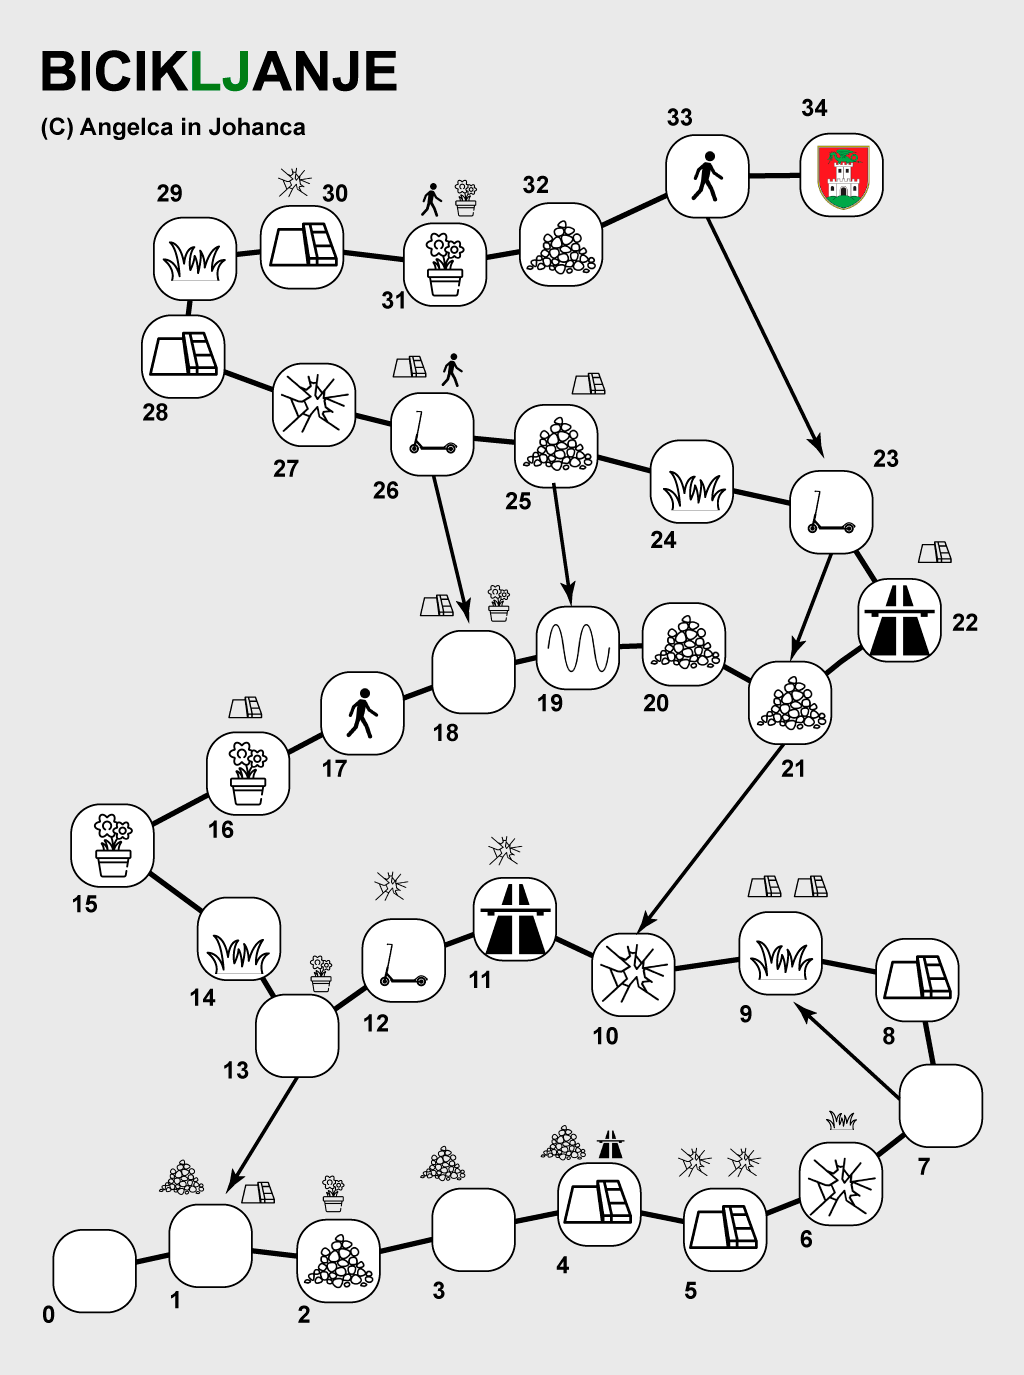

Igralna plošča je sestavljena iz 35 polj.

- Ob nekaterih poljih so narisani simboli, ki predstavljajo različne veščine, ki jih poznamo iz preteklih nalog. Igralec, ki pride na to polje, poslej obvlada to veščino (oziroma, dve, kjer sta narisani dve). V dokaz dobi kartico s simbolom te veščine. Na določenih poljih dobi več veščin ali celo večkrat isto (glej polji 5 in 9).
- Na nekaterih poljih so narisani simboli veščin. Igralec, ki pride na to polje, izgubi eno kartico s to veščino. Če je nima, se mora vrniti na začetno polje. (Če bi neko polje zahtevalo veščino, ki jo igralec dobi prav na tem polju, je vse OK.)
- Iz nekaterih poljih vodijo puščice. Igralec, ki pride na to polje, se pomakne na polje, na katero kaže puščice (če ni polje zahtevalo kake veščine, ki je nima; v tem primeru gre seveda na začetek). Če polje, na katerega ga je pripeljala puščica, vsebuje kake veščine, zahteva kake veščine ali pa ima puščico, se vsa ta zgodba ponovi tudi na tem polju (in naslednjih, če tako nanese).

Pogoji se preverjajo v tem vrstnem redu (igralec dobi veščine, nato se morda premakne na začetno polje, sicer pa, kamor vodi puščica).

Igralci začnejo na prvem polju in si prizadevajo priti na zadnje. Tidve polji nimata veščin ali puščic. (Kot je rekel Sigmund Freud, včasih je grb samo grb.)

Še nekaj: če je igralec, recimo, 2 polji pred koncem in vrže številko 3, se ne premakne. Ko je igralec na zadnjem polju, se seveda ne premika več.

Kako predstavite igralno ploščo v programu, je vaša stvar. Resno predlagam, da si izmislite primerno podatkovno strukturo, ne milijon `if`-ov.

Pri ocenjevanju bom upošteval tudi eleganco rešitve, zato so naloge tokrat za oceno 6-7 in tako naprej.

**Predlagam**, da v rešitvah za ocene od 7 naprej ne uporabljate funkcij, ki ste jih napisali za oceno 6, temveč raje "prepakirate" to kodo v ustrezne metode.

**Za določeno oceno je potrebno rešiti tudi naloge za nižje ocene.**

## Ocena 6 - 7

Napiši funkciji

- `zacetne_vescine()`, ki vrne podatkovno strukturo, ki predstavlja začetne veščine, ki jih ima igralec. Kakšna bo ta struktura (seznam kartic, slovar, množica ... datoteka?!), je tvoja stvar.

- `korak(polje, met, vescine)`, ki prejme trenutno polje, met (število pik na kocki) in vescine, torej kartice, ki jih ima trenutno igralec. Funkcija mora vrniti polje, na katerem je igralec po tem metu, in veščine, ki jih ima po tem, pri čemer mora upoštevati vse, kar je napisano zgoraj.

    Prvo polje ima številko 0.
    

### Rešitev

Rešimo lahko na kup načinov. Eden je tale: ploščo predstavimo s seznamom troj, ki povedo, kaj dobimo, kaj potrebujemo in kam gremo.

In [1]:
polja = [
    ("", "", None),  # 0
    ("gr", "", None), # 1
    ("l", "g", None), # 2
    ("g", "", None),
    ("ga", "r", None),
    ("cc", "r", None), # 5
    ("t", "c", None),
    ("", "", 9),
    ("", "r", None),
    ("rr", "t", None),
    ("", "c", None),  # 10
    ("c", "a", None),
    ("c", "b", 1),
    ("", "", 1),
    ("", "t", None),
    ("", "l", None),  # 15
    ("r", "l", None),
    ("", "p", None),
    ("rl", "", None),
    ("", "d", None),
    ("", "g", None),  # 20
    ("", "g", 10),
    ("r", "a", None),
    ("", "b", 21),
    ("", "t", None),
    ("r", "g", 19),  # 25
    ("rp", "b", 18),
    ("", "c", None),
    ("", "r", None),
    ("", "t", None),
    ("c", "r", None),  # 30
    ("pl", "l", None),
    ("", "g", None),
    ("", "p", 23),
    ("", "", None),
 ]

Veščine, ki jih ima igralec, bomo predstavili s slovarjem, katerega ključi so veščine (črke iz gornjega seznama), pripadajoče vrednosti pa veščine. Da bo preprosteje, bomo uporabili `defaultdict`; če bomo hoteli dodati veščino, ali pa vprašati, ali jo igralec poseduje, bo privzeta vrednost 0.

In [2]:
from collections import defaultdict

def zacetne_vescine():
    return defaultdict(int)

Korak je potem takšen.

In [1]:
def korak(polje, met, vescine):
    vescine = vescine.copy()
    
    if polje + met >= len(polja):
        return polje, vescine
    polje += met
    novo, obvezno, naprej = polja[polje]
    
    for vescina in novo:
        vescine[vescina] += 1
    if obvezno:
        if not vescine.get(obvezno):
            return 0, vescine
        vescine[obvezno] -= 1
        
    if naprej is not None:
        polje = naprej
        return korak(polje, 0, vescine)
    else:
        return polje, vescine


Podani slovar `vescine` kopiramo, ker ga bomo spreminjali, naloga pa zahteva, da veščine vračamo, torej nekako implicira, naj ne spreminjamo obstoječega slovarja. (To ni nujno - je pa nekako ... spodobno.)

Če bi met pripeljal igralca prek cilja, ne storimo ničesar, temveč le vrnemo trenutno polje in veščine. Sicer pa ga prestavimo in preberemo nove in obvezne veščine ter polje, na katero vodi morebitna puščica.

Nato v veščine dodamo nove veščine, potem pa preverimo, ali polje zahteva kakšno veščino. Če jo in je nima, gre na polje 0, sicer izgubi eno kartico s to veščino.

Na koncu preverimo, ali polje pelje kam naprej. Če, potem spremenimo polje in se delamo, da je igralec metal še enkrat in vrgel 0. Sicer pa pač vrnemo novo polje in veščine.

Tisti "se delamo, da je metal še enkrat" je bilo najlažje narediti s ponovnim (torej: rekurzivnim!) klicem funkcije `korak`. Gre pa tudi z običajno zanko.

In [4]:
def korak(polje, met, vescine):
    vescine = vescine.copy()
    if polje + met >= len(polja):
        return polje, vescine
    naprej = polje + met
    while naprej is not None:
        polje = naprej
        novo, obvezno, naprej = polja[polje]
        for vescina in novo:
            vescine[vescina] += 1
        if obvezno:
            if not vescine.get(obvezno):
                return 0, vescine
            vescine[obvezno] -= 1
    return polje, vescine

## Ocena 7 - 8

Napiši razred `Igralec` z metodami

- konstruktor ne prejme ničesar (razen `self`) in naredi, kar mora
- `korak(self, met)` prejme število pik na kocki in počne vse, kar počne `korak` iz naloge za oceno 6-7, le da je večina argumentov zdaj shranjena v objektu.
- `polje(self)` vrne polje, na katerem se nahaja igralec.

### Rešitev

Gornjo kodo preselimo v razred. `polje` in `vescine` ne bodo več argumenti funkcije temveč atributi razreda, pri čemer bo `polje` postalo `_polje`, da se ne tepe z imenom metode (istočasno pa podčrtaj sugerira, da gre za interno reč razreda).

Bistvo te naloge je bilo torej, da si znamo organizirati atribute razreda `Igralec`.

In [ ]:
class Igralec:
    def __init__(self):
        self._polje = 0
        self.vescine = defaultdict(int)

    def korak(self, met):
        if self._polje + met >= len(polja):
            return
        self._polje += met
        novo, obvezno, naprej = polja[self._polje]
        for vescina in novo:
            self.vescine[vescina] += 1
        if obvezno:
            if not self.vescine.get(obvezno):
                self._polje = 0
            else:
                self.vescine[obvezno] -= 1
        if naprej is not None:
            self.korak(naprej - self._polje)
            
    def polje(self):
        return self._polje

## Ocena 8 - 9

Napiši razred `Igra`.

- konstruktor prejme število igralcev.
- `korak(self, met)` prejme število pik na kocki. Premik opravi tisti igralec, ki je pač na vrsti.
- `polja(self)` vrne seznam polj, na katerih so igralci.

### Rešitev

Bistvo te naloge je bilo, da razumemo, da objekti lahko vsebujejo druge objekte. Vedno so jih (torej slovarji, seznami, nizi ... so objekti), vendar je študentom pogosto nenavadno, da lahko naš objekt vsebuje naše objekte.

Atributi objektov razreda `Igra` bo seznam igralcev (`igralci`) in indeks igralca, ki je na potezi (`na_potezi`).

Metoda `korak` reče ustreznemu igralcu, naj naredi `korak`, potem pa poveča indeks igralca na potezi za 1 in izračuna ostanek po deljenju s številom igralcev, da po zadnjem igralcu pridemo spet na ničtega.

Metoda `polja` pa pač vrne polja, na katerih so igralci.

In [5]:
class Igra:
    def __init__(self, igralcev):
        self.igralci = [Igralec() for _ in range(igralcev)]
        self.na_potezi = 0

    def korak(self, met):
        self.igralci[self.na_potezi].korak(met)
        self.na_potezi += 1
        self.na_potezi %= len(self.igralci)

    def polja(self):
        return [igralec.polje() for igralec in self.igralci]

## Ocena 9 - 10

Odsimuliraj 1000 iger z enim samim igralcem, pri čemer simuliraš kocko z `random.randint(1, 6)`. Koliko metov, v poprečju traja igra?

Testov ni. Rezultat mora biti okrog 530 (lahko pa tudi 20 več ali manj).

### Rešitev

Ocena 10 je dokaj podarjena. :)

In [6]:
def simulacija():
    potez = 0
    for _ in range(1000):
        ig = Igralec()
        for potez in count(potez + 1):
            ig.korak(random.randint(1, 6))
            if ig.polje() == len(polja) - 1:
                break
    return potez / 1000

## Ocena 12

Napiši program, ki poišče najkrajše zaporedje metov, ki pripelje do cilja.

Testov ni, ker nočem izdati rešitve. Kdor bo rešil, naj mi piše, če želi izvedeti, ali je rešitev pravilna.

### Rešitev

Tole sodi v tretji letnik, v Algoritme in podatkovne strukture.

In [7]:
def najkrajsa():
    znano = set()
    poskusiti = [(0, defaultdict(int), [])]
    for polje, vescine, meti in poskusiti:
        kom = (polje, tuple(vescine.items()))
        if kom in znano:
            continue
        znano.add(kom)
        if polje == len(polja) - 1:
            return meti
        for met in range(1, 7):
            poskusiti.append(korak(polje, met, vescine) + (meti + [met], ))

V `poskusiti` bo seznam vseh stanj, ki jih je potrebno še preiskati. V začetku je to stanje, ko smo na prvem polju, naše veščine so prazen slovar, terka z dosedanjimi meti pa je prazna.

V `znano` so vsi pari (polje, veščine), na katere smo že naleteli. Če ponovno naletimo na situacijo, v kateri smo na istem polju z istimi veščinamo, se z njo ne želimo ukvarjati ponovno. Ker bomo v `znano` dodajali in preverjali, ali vsebuje določen par, bo najprikladneje, da bo `znani` množica. Če bi namesto tega uporabili seznam, bi bilo program (lahko precej) počasnejši. Ker bomo uporabljali množice, bomo veščine pretvorili v terko, saj množice ne morejo shranjevati slovarjev. Elementi terke bodo pari (ključ, vrednost), urejeni po ključih, da se izognemo duplikatom.

V zanki gremo torej čez vsa stanja, ki jih je potrebno preskušiti. Če je že znano, se z njim ne ukvarjamo. Sicer ga dodamo med znanja stanja. Če gre za zadnje polje, vrnemo seznam metov, ki so nas pripeljali nanj. Sicer pa v seznam stanj, ki jih moramo pregledati, dodamo vsa stanja, v katerih se znajdemo, če na tem polju vržemo 1, 2, 3, 4, 5 ali 6.